# Regression Using a Neural Network

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shiernee/2022-ACOMP-AI-Workshop/blob/main/2022_Workshop_Day2_nn_tutorial.ipynb) 

In [7]:
# import libraries
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## [Diabetes dataset in scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

**Number of Instances:** 442

**Number of Attributes:** First 10 columns are numeric predictive values (real, -.2 < x < .2)

**Target:** Column 11 is a quantitative measure of disease progression one year after baseline (integer, 25 - 346)

**Attribute Information:**
- age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

***Note:*** *Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).*

In [5]:
# get the dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print('X_train.shape:{}'.format(X_train.shape))
print('y_train.shape:{}'.format(y_train.shape))
print('X_test.shape:{}'.format(X_test.shape))
print('y_test.shape:{}'.format(y_test.shape))

X_train.shape:(309, 10)
y_train.shape:(309,)
X_test.shape:(133, 10)
y_test.shape:(133,)


## Construct a neural network for regression

We will construct a **neural network with two hidden layers** to predict diabetes disease progression. Each hidden layer will have *ReLU (max(0,x))* activation function. There is no activation function at the output layer.

In [83]:
# create the model
model = MLPRegressor(hidden_layer_sizes=(16,16), activation='relu', learning_rate='constant', learning_rate_init=0.05, max_iter=1000, random_state=37)

## Train the model

In [84]:
# fit to train data
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 16), learning_rate='constant',
             learning_rate_init=0.05, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=37, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

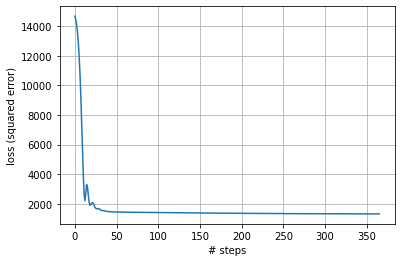

In [85]:
# plot loss curve
import matplotlib.pyplot as plt
plt.plot(model.loss_curve_)
plt.xlabel('# steps')
plt.ylabel('loss (squared error)')
plt.grid()

## Test the model

Train - mean squared error: 2628.641
Test - mean squared error: 2868.621


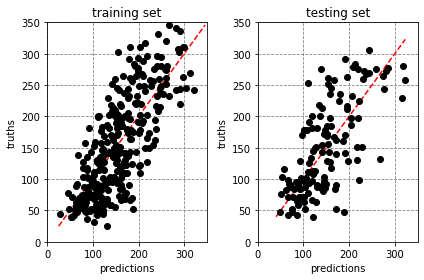

In [112]:
# performance check on the training set
predictions_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
print('Train - mean squared error: {:.3f}'.format(mse_train))

# performance check on the test set
predictions_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predictions_test)
print('Test - mean squared error: {:.3f}'.format(mse_test))


# plot truth vs. predictions
fig,ax = plt.subplots(1,2)

min_train = min(np.amin(predictions_train),np.amin(y_train))
max_train = max(np.amax(predictions_train),np.amax(y_train))
ax[0].plot([min_train,max_train], [min_train,max_train], linestyle='--', color='red', zorder=1)
ax[0].scatter(predictions_train, y_train, c='k')
ax[0].set_title('training set')
ax[0].set_xlabel('predictions')
ax[0].set_ylabel('truths')
ax[0].set_xlim(((min_train//50)*50,(max_train//50 + 1)*50))
ax[0].set_ylim(((min_train//50)*50,(max_train//50 + 1)*50))
ax[0].set_axisbelow(True)
ax[0].grid(color='gray', linestyle='dashed')

min_test = min(np.amin(predictions_test),np.amin(y_test))
max_test = max(np.amax(predictions_test),np.amax(y_test))
ax[1].plot([min_test,max_test], [min_test,max_test], linestyle='--', color='red', zorder=1)
ax[1].scatter(predictions_test, y_test, c='k')
ax[1].set_title('testing set')
ax[1].set_xlabel('predictions')
ax[1].set_ylabel('truths')
ax[1].set_xlim(((min_test//50)*50,(max_test//50 + 1)*50))
ax[1].set_ylim(((min_test//50)*50,(max_test//50 + 1)*50))
ax[1].set_axisbelow(True)
ax[1].grid(color='gray', linestyle='dashed')

fig.tight_layout()